# Business problem

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 




1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
2. What metric would you report for this dataset?
3. What is its value?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown --id 14E3XpCMjxqobjvryBeO0K1UmOhlLugbi

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14E3XpCMjxqobjvryBeO0K1UmOhlLugbi
To: /content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv
100% 230k/230k [00:00<00:00, 67.3MB/s]


In [3]:
df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


# Explore the data

In [5]:
# Check if the shop id corresponds to 100
df['shop_id'].value_counts()

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

In [6]:
# Check if there're duplicated orders
df['order_id'].value_counts()

1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: order_id, Length: 5000, dtype: int64

In [7]:
# Luckily no dplicates
df['order_id'].duplicated().sum()

0

In [8]:
# This is the Naive AOV
# Since the order id is unique, just calculate the mean
df['order_amount'].mean()

3145.128

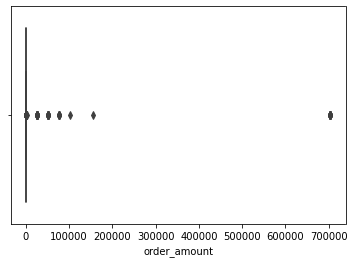

In [9]:
# We found extreme values that would affect the Naive AOV
sns.boxplot(x=df['order_amount'], fliersize=5)
plt.show()

In [10]:
# Just checking the total items per order
# There are 17 orders with 20000 items (extreme value!)
df['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In [11]:
# Nothing is wrong with payment method for now
df['payment_method'].value_counts()

credit_card    1735
debit          1671
cash           1594
Name: payment_method, dtype: int64

# Outlier detection

Theory:


![](https://cdn.thinglink.me/api/image/885113196086558722/1024/10/scaletowidth/0/0/1/1/false/true?wait=true)

In [12]:
# Creating some basic statistics to detect outliers
Q1 = np.percentile(df['order_amount'], 25)
Q3 = np.percentile(df['order_amount'], 75)
IQR = Q3-Q1
Lower = Q1-1.5*IQR
Upper = Q3+1.5*IQR

In [13]:
# Everything above the Upper the Upper IQR would be considered outliers statistically
df.iloc[np.where(df['order_amount']>Upper)[0],:]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
99,100,18,752,780,5,cash,2017-03-06 23:41:16
136,137,15,961,765,5,credit_card,2017-03-26 05:06:46
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
...,...,...,...,...,...,...,...
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
4927,4928,74,849,765,5,cash,2017-03-28 06:55:57
4952,4953,26,786,880,5,cash,2017-03-17 01:50:18
4958,4959,70,711,865,5,credit_card,2017-03-08 17:22:51


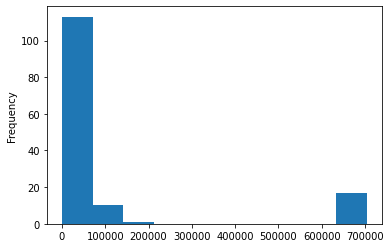

In [14]:
# The distribution is highly skewed
df.iloc[np.where(df['order_amount']>Upper)[0],:]['order_amount'].plot(kind='hist')
plt.show()

In [15]:
# It's interesting that we have 17 orders with order_amount of $704k, the same amount as total_items=2000
df.iloc[np.where(df['order_amount']>Upper)[0],:]['order_amount'].value_counts().sort_index(ascending=False)

704000    17
154350     1
102900     1
77175      9
51450     16
25725     19
1760       1
1408       2
1086       1
1064       1
1056       3
980        1
965        1
960        2
948        1
935        3
920        1
890        1
885        2
880        3
865        2
845        1
830        3
816        1
815        2
810        1
805        2
804        2
800        3
790        2
786        1
784        2
780        8
774        1
772        2
765        5
760        4
748        5
745        2
740        1
736        4
735        1
Name: order_amount, dtype: int64

Analysis: The extreme values could come from wholesale retailers

In [16]:
# The orders with 704000 are the same orders that have 2000 items
# They are placed by the same user (607) in the same shop in March 2017
df.iloc[np.where(df['total_items']==2000)[0]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [17]:
# Create a new feature describing the amount per item
df['amount_per_item'] = df['order_amount']/df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


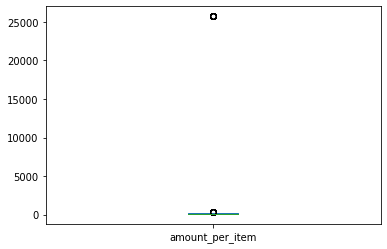

In [18]:
# Looks like there're still extreme values
df['amount_per_item'].plot(kind='box')
plt.show()

In [19]:
# 25725 is the only extreme value, for one pair of sneaker.
df['amount_per_item'].value_counts().sort_index(ascending=False).head(10)

25725.0     46
352.0       51
201.0       53
196.0       61
195.0       54
193.0       44
190.0       35
187.0      105
184.0       49
181.0      112
Name: amount_per_item, dtype: int64

In [20]:
# They all come from the same shop (78)
# It could be high-end sneakers shop
# It's interesting that a large amount of people paid the order by cash
df.iloc[np.where(df['amount_per_item']==25725)][['shop_id','user_id','order_amount','total_items','amount_per_item','payment_method']]

,shop_id,user_id,order_amount,total_items,amount_per_item,payment_method
160,78,990,25725,1,25725.0,credit_card
490,78,936,51450,2,25725.0,debit
493,78,983,51450,2,25725.0,cash
511,78,967,51450,2,25725.0,cash
617,78,760,51450,2,25725.0,cash
691,78,878,154350,6,25725.0,debit
1056,78,800,25725,1,25725.0,debit
1193,78,944,25725,1,25725.0,debit
1204,78,970,25725,1,25725.0,credit_card
1259,78,775,77175,3,25725.0,credit_card


## Analysis

From the above analysis, we found where the outliers come from. Some of my guesses:

- User 607 and shop 42 might be in a wholesale relationship.
- Shop 78 might be a high-end sneaker shop.

# User and shop analysis

Let's first find out what's going on ith shop 42.

The table shows that shop 42 does not only do wholesale. There're quite amount of individual buyers.

In [21]:
df.iloc[np.where(df['shop_id']==42)[0]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15,352.0
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:04,352.0


In [22]:
# We know that 607 is a frequent visitor of shop 42.
df.iloc[np.where(df['shop_id']==42)[0]]['user_id'].value_counts()

607    17
770     2
819     2
739     2
868     2
886     1
726     1
830     1
839     1
975     1
859     1
962     1
788     1
736     1
809     1
872     1
970     1
951     1
747     1
793     1
934     1
756     1
946     1
907     1
926     1
797     1
744     1
808     1
792     1
904     1
720     1
Name: user_id, dtype: int64

Let's find out what's going on with shop 78.

In [23]:
print('There are {} orders with price per item of 25725, and shop 78 in total has {} orders.'.format(df.iloc[np.where(df['amount_per_item']==25725)].shape[0],
                                                          df.iloc[np.where(df['shop_id']==78)[0]].shape[0]))


There are 46 orders with price per item of 25725, and shop 78 in total has 46 orders.


From the analysis, we could see the users who purchase from shop 78 also purchase from other shops. It veryfies they are not robots, etc. Except user 855, other user only buy from shop 78 once in March.

In [24]:
df.iloc[np.where(df['amount_per_item']==25725)]['user_id'].value_counts().head(5)

855    2
990    1
766    1
817    1
740    1
Name: user_id, dtype: int64

In [25]:
high_end_buyers = df.iloc[np.where(df['amount_per_item']==25725)]['user_id'].value_counts().index.tolist()  # find the users who purchase the expensive sneakers
purchase_history = []
for high_end_buyer in high_end_buyers:  # check if these users also purchase from other shops
  purchase_history.append(df.iloc[np.where(df['user_id']==high_end_buyer)].shape[0])

high_end_buyers_purchase_history = pd.DataFrame({'user_id':high_end_buyers,'purchase_history':purchase_history})
high_end_buyers_purchase_history

,user_id,purchase_history
0,855,17
1,990,19
2,766,10
3,817,16
4,740,14
5,910,15
6,745,24
7,927,13
8,928,16
9,982,17


In [26]:
# Shop 78 only sells expensive sneakers.
df.iloc[np.where(df['shop_id']==78)[0]]['amount_per_item'].value_counts()

25725.0    46
Name: amount_per_item, dtype: int64

Finally let's check where those outliers come from

In [27]:
outliers = df.iloc[np.where(df['order_amount']>Upper)[0],:]['order_amount'].value_counts().sort_index(ascending=False).index.tolist()
for i in range(10):
  print(f'Outlier {i} comes from: Shop', df.iloc[np.where(df['order_amount']==outliers[i])]['shop_id'].unique())

Outlier 0 comes from: Shop [42]
Outlier 1 comes from: Shop [78]
Outlier 2 comes from: Shop [78]
Outlier 3 comes from: Shop [78]
Outlier 4 comes from: Shop [78]
Outlier 5 comes from: Shop [78]
Outlier 6 comes from: Shop [42]
Outlier 7 comes from: Shop [42]
Outlier 8 comes from: Shop [43]
Outlier 9 comes from: Shop [54]


## Conclusion

After a quick analysis, we found there are some outliers that affect the AOV metric. However, these outliers are potential real transactions. We should pay more attention on shop 42 and 78, monitoring daily transactions to see if there're any abnormal cases.

- Shop 42 has extreme amount of items sold in part of its transactions, causing the value of order to be unexpected large.
-  Shop 78 has extremely high unit price for the item sold. The price tag would be impossible for a small sneaker brand, but reasonable for a luxury brand.

# Metric to report

**I would consider using the 50% quantile as the reflective metric of the dataset. The median order value (MOV) would be $284 in March 2017.**

An additional quantile plot would better demonstrate how this dataset looks like.

In [33]:
df['order_amount'].quantile(0.5)

284.0

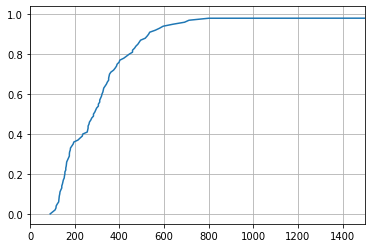

In [29]:
quan = df['order_amount'].quantile(np.arange(0,1,0.01))
ax = plt.plot(quan.values, quan.index)
plt.xlim([0,1500])
plt.grid(True)
plt.show()